# Potential Energy Scans and Visualisation of Trajectories


The range of problems that can be tackled with Psi4 or other electronic structure packages is not limited
to wavefunction or geometry optimisations. We can use python to create complex inputs, adjusting various settings, or making specific modifications of
some variables. 

In this set of exercises, you will instruct Psi4 to
selectively scan one degree of freedom of a potential energy surface.

## Scanning a Potential Energy Surface: Dihedral Scan of Butane


Potential energy surfaces (PES) are complex objects which are, in
general, 3N-6 dimensional, where N is the number of atoms. Therefore, obtaining the complete topology of
a PES is not feasible for most molecules. However, one may limit the
sampling of the surface to a few degrees of freedom that are of interest
and relevant to the problem under examination (*cf.* figure 1). Scans
along limited degrees of freedom may be helpful if one needs information
about various possible (local) minima, for example if (or whether) one
is trapped in one of them. In practice, the degrees of freedom can be
defined by a Z-matrix, such as the one that you have already been using
in the previous exercises.



```{figure} ../../images/pesslize.jpg
---
name: PES
---
Example of a 2D PES (right) and a 1D potential energy profile (left)
obtained by considering only one degree of freedom.
```



In a *relaxed PES scan*, all degrees of freedom that are not under
consideration are optimised, and one obtains a minimum energy path along
the chosen degree(s) of freedom. This implies that a constrained
optimisation is carried out for each desired value of the degree of
freedom that is being sampled.
Instead, one may freeze the remaining degrees of
freedom, keeping them fixed at their initial values, lowering the computational cost. This procedure is
referred to as a *rigid PES scan*. For simple scans of bond angles or
lengths in a pre-optimised structure, this is often sufficient (and more
efficient). 

In this exercise, you will perform a relaxed potential energy
scan of the dihedral in butane in order to determine the possible
configurational minima, and the rotational barrier.

In [1]:
import psi4
import py3Dmol
import numpy as np
import matplotlib.pyplot as plt

In [2]:
psi4.set_num_threads(2)
psi4.set_memory('2 GB')

2000000000

  Threads set to 2 by Python driver.

  Memory set to   1.863 GiB by Python driver.


In [3]:
import sys
sys.path.append("..")
from helpers import *

### Starting geometry

In [13]:
butane = psi4.geometry("""
C       
C    1    1.450000
C    1    1.450000      2  109.471000
H    1 1.089         2 109.471000         3 120
H    1 1.089        2 109.471000          3 -120
C    2 1.45         1 109.471000         3 180
H    2 1.089        1 109.471000        6 120
H    2 1.089         1 109.471000          6 240
H    3 1.089         1 109.471000          2 180
H    3 1.089        1 109.471000         9 120
H    3 1.089        1 109.471000         9 240
H    6 1.089        2 109.471000         1 180
H    6 1.089       2 109.471000        12 120
H    6 1.089        2 109.471000        12 240
""")


In [28]:
drawXYZ_labeled(butane)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [15]:
drawXYZ(butane)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### PES scan

Now that we had a look at the butane molecule, let's perform the rigid PES scan. We will fix the dihedral angle at different values and do single point calculations. 
First, we need to optimize the the geometry provided above. 

In [16]:
psi4.core.clean_options()
psi4.core.clean()
psi4.core.clean_variables()

In [ ]:
# Do Something HERE
# optimize the butane molecule from the starting geometry provided
# use the blyp method and the 6-31+G* basis set

In [ ]:
dihedrals = np.linspace(180,-180, 37) #We set here the dihedrals that we are going to use for the scan
PES = {} #Here we will store the optimized energy for each dihedral. This is a dictionary
geometries = [] #Here we will store the optimized geometries. This is a list

In [21]:
butane.print_in_input_format()

The geometry optimization will print you the optimized coordinates in the format you provided them at the end if you call `butane.print_in_input_format()`. Here, this is the z-matrix format. Use these coordinates below and create a python f-string where you replace the dihedral that we want to scan with a variable. 

Save the molecules in the `geometries` list (use `butane.clone()`) and save the calculated energies in the `PES` dictionary.



In [18]:
psi4.core.set_output_file('output.dat', False)


In [ ]:
# Do something HERE 
#for dihedral in dihedrals:
#    print(f"optimizing {dihedral}")
#    butane = psi4.geometry(f"""  #you get this geometry from the print_in_input_format() command
#    x i bond k angle j {dihedral} #this is the dihedral we want to optimize
#    x i bond k angle j dihedral
#    """)
#    E = .... # the energy should be calculated using the same method and basis set above
#    PES[dihedral] =  set to energy just calculated
#    geometries.append( insert clone of molecule here   )

In [20]:
# Convert the energy units to kcal/mol
# you can use psi4.constants.hartree2kcalmol for the unit conversion 
# in python you can use list comprehensions e.g [x+1 for x in lst] will increase every value in lst by 1.
# to access the values in the dictionary PES you can use PES.values() which return a list.
# to construct the list comprehensions set energies equal to... .
# [e*conversionfactor for e in list(insert the call to the list of PES values here)].
energies = None

#Rescale the energy scale by setting the minimum value as the zero of the scale
#and change everything accordingly
# the function np.min(lst) returns the lowest value of a list. 
# to use broadcasting you need to convert the list into a np.array by calling np.array(energies)
energies = None

array([ 180.,  170.,  160.,  150.,  140.,  130.,  120.,  110.,  100.,
         90.,   80.,   70.,   60.,   50.,   40.,   30.,   20.,   10.,
          0.,  -10.,  -20.,  -30.,  -40.,  -50.,  -60.,  -70.,  -80.,
        -90., -100., -110., -120., -130., -140., -150., -160., -170.,
       -180.])

For relaxed scans you can use such a input structure. However, in the interest of time we perform a rigid scan here. 

``` python
for dihedral in dihedrals:
    psi4.set_options({
        "fixed_dihedral": f"4 2 1 3 {dihedral}", #This option specifies the dihedral angles between atoms to be fixed 
    })
    E = psi4.optimize('blyp/6-31+G*', molecule=butane)
```
    

### Visualization of the Results

Now, let’s plot the PES at the different dihedral considered. You can use a little helper function which will read in the optimized geometries just calculated and the dihedrals and return the PES and the corresponding geometry at each dihedral value.

In [24]:
traj = [geom.save_string_xyz_file() for geom in geometries]
traj_arrays = [geom.to_arrays()[0] for geom in geometries]

drawXYZGeomSliderMolecularProperty(traj, dihedrals, energies, 'dihedral')
# for the slider to function properly you must have dihedral angles of exact integers. 
# If that is not the case, adjust the number of dihedrals to divide -180 to 180 degrees into even steps (including the zero value).

interactive(children=(IntSlider(value=0, description='quantity', max=180, min=-180, step=10), Output()), _dom_…

Now, we can monitor different quantities during the rigid PES scan, to understand how the different dihedrals affect the overall geometry. One example is the bond length between C atoms 1 and 2, the central atoms of the dihedral for which we performed the scan. Having a look at the fluctuations of this bond legth during the scan can be easily done using one of the helper functions, which will read the coordinates of the two atoms and calculate their distance.

In [25]:
bond_length = []

for geom in traj_arrays:
    bond_length.append(calculate_bond(geom[0], geom[1])) #Here the bond length is calculated and saved in the list

In [ ]:
fig, ax = plt.subplots(1)
ax.plot(dihedrals, bond_length)
ax.set_xlabel('dihedral')
ax.set_ylabel('bond [A]')
plt.show()

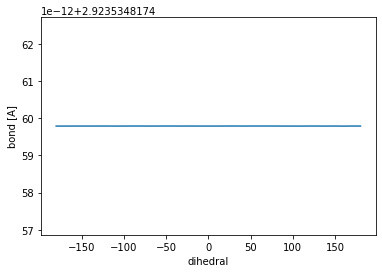

In [26]:
fig, ax = plt.subplots(1)
ax.plot(dihedrals, bond_length)
ax.set_xlabel('dihedral')
ax.set_ylabel('bond [A]')
plt.show()

```{admonition} Exercise 1
:class: exercise
Does the bond length of the $H_3CH_2C-CH_2CH_3$ bond fluctuate as
    the dihedral is changed? Why (not)?
```



```{admonition} Exercise 2
:class: exercise
Create a potential energy profile along the dihedral by plotting the
    energies of the system as a function of the scanned dihedral angle as done above.
    Then, to each maximum and minimum, assign the corresponding
    conformation from your trajectory. Show these conformations in your
    report.
    Assign also names to the conformations according to the *Newman
    projections* you know from organic chemistry (where possible).

```




```{admonition} Exercise 3
:class: exercise
The rotational barrier of butane lies between 5 and 6 kcal
    mol$^{-1}$ [^Murcko1996]. Compare this value with the one you calculated and explain possible sources of error, leading to higher or lower barriers.
```
[^Murcko1996] : Murcko M. A., Castejon H., Wiberg K.B., J. Phys. Chem., 1996, 100, 16162

